***
# <font color=green size=10>CURSO DE ESTATÍSTICA - PARTE 1 - Projeto de estatística descritiva</font>
***

## Trabalho de Análise Descritiva de um Conjunto de Dados

Utilizando os conhecimentos adquiridos em nosso treinamento realize uma análise descritiva básica de um conjunto de dados retirados da Pesquisa Nacional por Amostra de Domicílios - 2015 do IBGE. 

Vamos construir histogramas, calcular e avaliar medidas de tendência central, medidas separatrizes e de dispersão dos dados.

Siga o roteiro proposto e vá completando as células vazias. Procure pensar em mais informações interessantes que podem ser exploradas em nosso dataset.

# <font color=green>DATASET DO PROJETO</font>
***

### Pesquisa Nacional por Amostra de Domicílios - 2015

A <b>Pesquisa Nacional por Amostra de Domicílios - PNAD</b> investiga anualmente, de forma permanente, características gerais da população, de educação, trabalho, rendimento e habitação e outras, com periodicidade variável, de acordo com as necessidades de informação para o país, como as características sobre migração, fecundidade, nupcialidade, saúde, segurança alimentar, entre outros temas. O levantamento dessas estatísticas constitui, ao longo dos 49 anos de realização da pesquisa, um importante instrumento para formulação, validação e avaliação de políticas orientadas para o desenvolvimento socioeconômico e a melhoria das condições de vida no Brasil.

### Fonte dos Dados

https://ww2.ibge.gov.br/home/estatistica/populacao/trabalhoerendimento/pnad2015/microdados.shtm

### Variáveis utilizadas

> ### Renda
> ***

Rendimento mensal do trabalho principal para pessoas de 10 anos ou mais de idade.

> ### Idade
> ***

Idade do morador na data de referência em anos.

> ### Altura (elaboração própria)
> ***

Altura do morador em metros.

> ### UF
> ***

|Código|Descrição|
|---|---|
|11|Rondônia|
|12|Acre|
|13|Amazonas|
|14|Roraima|
|15|Pará|
|16|Amapá|
|17|Tocantins|
|21|Maranhão|
|22|Piauí|
|23|Ceará|
|24|Rio Grande do Norte|
|25|Paraíba|
|26|Pernambuco|
|27|Alagoas|
|28|Sergipe|
|29|Bahia|
|31|Minas Gerais|
|32|Espírito Santo|
|33|Rio de Janeiro|
|35|São Paulo|
|41|Paraná|
|42|Santa Catarina|
|43|Rio Grande do Sul|
|50|Mato Grosso do Sul|
|51|Mato Grosso|
|52|Goiás|
|53|Distrito Federal|

> ### Sexo	
> ***

|Código|Descrição|
|---|---|
|0|Masculino|
|1|Feminino|

> ### Anos de Estudo
> ***

|Código|Descrição|
|---|---|
|1|Sem instrução e menos de 1 ano|
|2|1 ano|
|3|2 anos|
|4|3 anos|
|5|4 anos|
|6|5 anos|
|7|6 anos|
|8|7 anos|
|9|8 anos|
|10|9 anos|
|11|10 anos|
|12|11 anos|
|13|12 anos|
|14|13 anos|
|15|14 anos|
|16|15 anos ou mais|
|17|Não determinados| 
||Não aplicável|

> ### Cor
> ***

|Código|Descrição|
|---|---|
|0|Indígena|
|2|Branca|
|4|Preta|
|6|Amarela|
|8|Parda|
|9|Sem declaração|

#### <font color='red'>Observação</font>
***
> Os seguintes tratamentos foram realizados nos dados originais:
> 1. Foram eliminados os registros onde a <b>Renda</b> era inválida (999 999 999 999);
> 2. Foram eliminados os registros onde a <b>Renda</b> era missing;
> 3. Foram considerados somente os registros das <b>Pessoas de Referência</b> de cada domicílio (responsável pelo domicílio).

***
***

### Utilize a célula abaixo para importar as biblioteca que precisar para executar as tarefas
#### <font color='red'>Sugestões: pandas, numpy, seaborn</font>

In [67]:
import pandas as pd
import numpy as np
import seaborn as sns

### Importe o dataset e armazene o conteúdo em uma DataFrame

In [68]:
DataFrame = pd.read_csv('dados.csv')

### Visualize o conteúdo do DataFrame

In [69]:
DataFrame

,UF,Sexo,Idade,Cor,Anos de Estudo,Renda,Altura
0,11,0,23,8,12,800,1.603808
1,11,1,23,2,12,1150,1.739790
2,11,1,35,8,15,880,1.760444
3,11,0,46,2,6,3500,1.783158
4,11,1,47,8,9,150,1.690631
...,...,...,...,...,...,...,...
76835,53,1,46,2,11,812,1.687030
76836,53,0,30,4,7,1500,1.792934
76837,53,0,32,8,12,1300,1.830587
76838,53,0,57,8,4,1500,1.726344


### Para avaliarmos o comportamento da variável RENDA vamos construir uma tabela de frequências considerando as seguintes classes em salários mínimos (SM)
#### <font color='blue'>Descreva os pontos mais relevantes que você observa na tabela e no gráfico.</font>

Classes de renda:

<b>A</b> ► Acima de 25 SM

<b>B</b> ► De 15 a 25 SM

<b>C</b> ► De 5 a 15 SM

<b>D</b> ► De 2 a 5 SM

<b>E</b> ► Até 2 SM

Para construir as classes de renda considere que o salário mínimo na época da pesquisa era de <b>R$ 788,00</b>.

#### Siga os passos abaixo:

### 1º Definir os intevalos das classes em reais (R$)

In [70]:
DataFrame['Renda'].min()

0

In [71]:
DataFrame['Renda'].max()

200000

In [72]:
#considerando o salário mínimo de 2015 = 788
classes = [ 0, 1576, 3152, 7880, 15760, 200000]

### 2º Definir os labels das classes

In [73]:
labels = ['E', 'D', 'C', 'B', "A"]

### 3º Construir a coluna de frequências

In [74]:
frequencia = pd.value_counts(
    pd.cut(x = DataFrame.Renda,
       bins = classes,
       labels = labels,
       include_lowest = True)
)
frequencia

E    49755
D    16700
C     7599
B     2178
A      608
Name: Renda, dtype: int64

### 4º Construir a coluna de percentuais

In [75]:
percentuais = pd.value_counts(
    pd.cut(x = DataFrame.Renda,
       bins = classes,
       labels = labels,
       include_lowest = True),
       normalize = True,
)*100
percentuais

E    64.751432
D    21.733472
C     9.889381
B     2.834461
A     0.791255
Name: Renda, dtype: float64

### 5º Juntar as colunas de frequência e percentuais e ordenar as linhas de acordo com os labels das classes

In [76]:
Dist_classes = pd.DataFrame({
    'Frequência' : frequencia,
    'Porcentagem (%)' : percentuais
}).sort_index(ascending = False)
Dist_classes

,Frequência,Porcentagem (%)
A,608,0.791255
B,2178,2.834461
C,7599,9.889381
D,16700,21.733472
E,49755,64.751432


### Construa um gráfico de barras para visualizar as informações da tabela de frequências acima

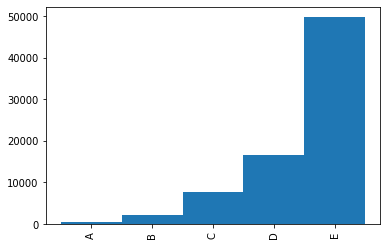

In [77]:
Dist_classes['Frequência'].plot.bar(width = 1)

> ### Conclusões

Cerca de 65% das pessoas entrevistadas foram classificadas na classe E, com a renda até 1.576 reais em 2015.
Apenas 0,79% das pessoas eram da classe A, ou seja, com renda maior a 15.760 reais.

### Crie um histograma para as variáveis QUANTITATIVAS de nosso dataset
#### <font color='blue'>Descreva os pontos mais relevantes que você observa nos gráficos (assimetrias e seus tipos, possíveis causas para determinados comportamentos etc.)</font>

In [78]:
#Variáveis quantitativas: Idade, Anos de Estudo, Renda e Altura
DataFrame.head()

,UF,Sexo,Idade,Cor,Anos de Estudo,Renda,Altura
0,11,0,23,8,12,800,1.603808
1,11,1,23,2,12,1150,1.739790
2,11,1,35,8,15,880,1.760444
3,11,0,46,2,6,3500,1.783158
4,11,1,47,8,9,150,1.690631


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0.5, 0, 'Anos')

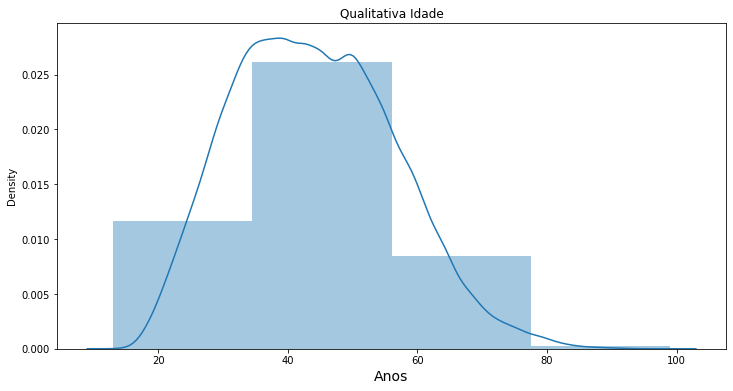

In [79]:
ax = sns.distplot(DataFrame['Idade'], bins = 4)

#config:
ax.figure.set_size_inches(12, 6)
ax.set_title('Qualitativa Idade')
ax.set_xlabel('Anos', fontsize = 14)


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0.5, 0, 'Anos')

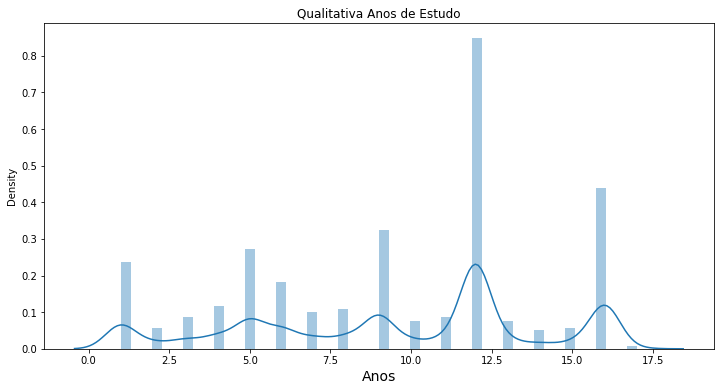

In [80]:
ax = sns.distplot(DataFrame['Anos de Estudo'])

#config:
ax.figure.set_size_inches(12, 6)
ax.set_title('Qualitativa Anos de Estudo')
ax.set_xlabel('Anos', fontsize = 14)

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0.5, 0, 'Reais')

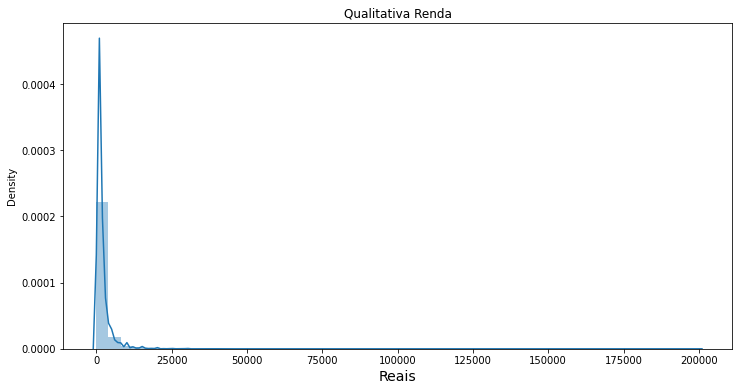

In [81]:
ax = sns.distplot(DataFrame['Renda'])

#config:
ax.figure.set_size_inches(12, 6)
ax.set_title('Qualitativa Renda')
ax.set_xlabel('Reais', fontsize = 14)

> ### Conclusões

Quanto ao histograma de idade:
>Distribuição normal, com média entre 40 e 50 anos.

Quanto ao histograma de anos de estudo:
> Percebemos que a distribuição dos dados encaixam-se deslocando-se para a esquerda, uma vez que a moda encontra-se deslocada para a direita no gráfico. Além disso, notam-se picos de frequencia em alguns valores específicos, coincidindo com o tempo de estudo de acordo com a conclusão de algum nível de ensino (por exemplo, ensino básico, médio, superior, etc.)

Quanto ao histograma de renda:
>É o gráfico mais absurdamente deslocado, com a maior diferença de frequência, com a moda deslocada a esquerda. O valor máximo, sendo de frequencia muito pequena em relação à moda dificulta a leitura mais minuciosa dos dados. O gráfico evidencia a discrepância da distribuição da renda entre os entrevistados, a grande maioria dos entrevistados (mais de 86%) ganham menos que BRL 3152,00, enquanto a renda máxima chega a BRL 200.000,00.

### Para a variável RENDA, construa um histograma somente com as informações das pessoas com rendimento até R$ 20.000,00

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0.5, 0, 'Reais')

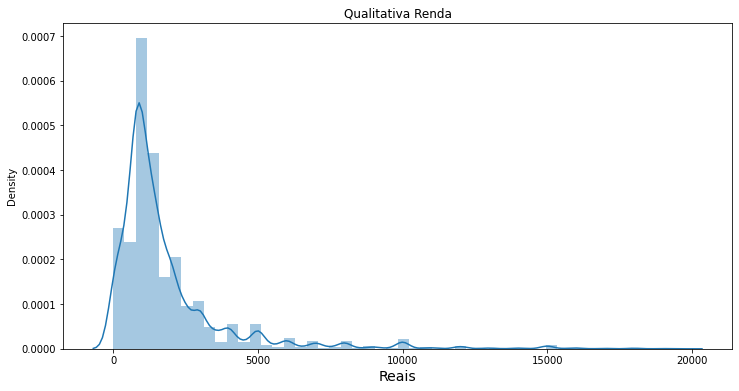

In [82]:
ax = sns.distplot(DataFrame.query('Renda < 20000')['Renda'])

#config:
ax.figure.set_size_inches(12, 6)
ax.set_title('Qualitativa Renda')
ax.set_xlabel('Reais', fontsize = 14)

### Construa uma tabela de frequências e uma com os percentuais do cruzando das variáveis SEXO e COR
#### <font color='blue'>Avalie o resultado da tabela e escreva suas principais conclusões</font>
#### <font color='red'>Utilize os dicionários abaixo para renomear as linha e colunas das tabelas de frequências e dos gráficos em nosso projeto</font>

In [83]:
sexo = {
    0: 'Masculino', 
    1: 'Feminino'
}
cor = {
    0: 'Indígena', 
    2: 'Branca', 
    4: 'Preta', 
    6: 'Amarela', 
    8: 'Parda', 
    9: 'Sem declaração'
}
anos_de_estudo = {
    1: 'Sem instrução e menos de 1 ano', 
    2: '1 ano', 
    3: '2 anos', 
    4: '3 anos', 
    5: '4 anos', 
    6: '5 anos', 
    7: '6 anos', 
    8: '7 anos', 
    9: '8 anos', 
    10: '9 anos', 
    11: '10 anos', 
    12: '11 anos', 
    13: '12 anos', 
    14: '13 anos', 
    15: '14 anos', 
    16: '15 anos ou mais', 
    17: 'Não determinados'
}
uf = {
    11: 'Rondônia', 
    12: 'Acre', 
    13: 'Amazonas', 
    14: 'Roraima', 
    15: 'Pará', 
    16: 'Amapá', 
    17: 'Tocantins', 
    21: 'Maranhão', 
    22: 'Piauí', 
    23: 'Ceará', 
    24: 'Rio Grande do Norte', 
    25: 'Paraíba', 
    26: 'Pernambuco', 
    27: 'Alagoas', 
    28: 'Sergipe', 
    29: 'Bahia', 
    31: 'Minas Gerais', 
    32: 'Espírito Santo', 
    33: 'Rio de Janeiro', 
    35: 'São Paulo', 
    41: 'Paraná', 
    42: 'Santa Catarina', 
    43: 'Rio Grande do Sul', 
    50: 'Mato Grosso do Sul', 
    51: 'Mato Grosso', 
    52: 'Goiás', 
    53: 'Distrito Federal'
}

In [84]:
cruzada_freq = pd.crosstab(
    DataFrame['Sexo'],
    DataFrame['Cor']
)
cruzada_freq.rename(columns = cor, inplace = True)
cruzada_freq.rename(index = sexo, inplace = True)

cruzada_freq

Cor,Indígena,Branca,Preta,Amarela,Parda
Sexo,,,,,
Masculino,256,22194,5502,235,25063
Feminino,101,9621,2889,117,10862


In [85]:
cruzada_perc = pd.crosstab(
    DataFrame['Sexo'],
    DataFrame['Cor'],
    normalize = True
)*100
cruzada_perc.rename(columns = cor, inplace = True)
cruzada_perc.rename(index = sexo, inplace = True)

cruzada_perc

Cor,Indígena,Branca,Preta,Amarela,Parda
Sexo,,,,,
Masculino,0.333160,28.883394,7.160333,0.305830,32.617126
Feminino,0.131442,12.520822,3.759761,0.152264,14.135867


In [86]:
Total_sexo = DataFrame.shape[0]
Freq_sexo = (pd.DataFrame(
            DataFrame['Sexo'].value_counts()
            )/Total_sexo*100).round(3)

#config
Freq_sexo.rename(index = sexo, inplace = True)
Freq_sexo.rename(columns = {'Sexo' : 'Frequência'}, inplace = True)

Freq_sexo

,Frequência
Masculino,69.3
Feminino,30.7


array([<matplotlib.axes._subplots.AxesSubplot object at 0x7f6ac41c8d90>,
      dtype=object)

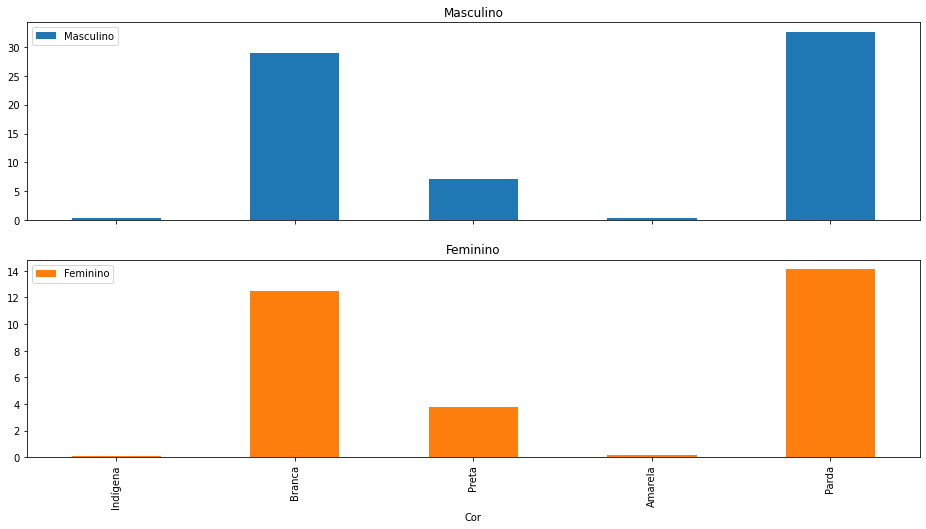

In [87]:
cruzada_perc_2 = pd.crosstab(
    DataFrame['Cor'],
    DataFrame['Sexo'],
    normalize = True
)*100
cruzada_perc_2.rename(index = cor, inplace = True)
cruzada_perc_2.rename(columns = sexo, inplace = True)

cruzada_perc_2


cruzada_perc_2.plot.bar(subplots = True, figsize = (16, 8))

> ### Conclusões
>
Para este dataset, foram considerados apenas os chefes de família para responder a pesquisa. Percebemos que há uma grande disparidade entre quantidade de mulheres (30,7%) versus homens (69,3%) chefes de família. 
>
Ou seja, menos de um terço das famílias pesquisadas declararam uma pessoa do gênero feminino como chefe de seus domicílios.

>
Apesar disso, a distribuição dos dados é similar quando consideramos a cor da pele, independentemente de gênero.


## Realize, para a variável RENDA, uma análise descritiva com as ferramentas que aprendemos em nosso treinamento

### Obtenha a média aritimética

In [88]:
Media = DataFrame['Renda'].mean()
Media

2000.3831988547631

### Obtenha a mediana

In [89]:
Mediana = DataFrame['Renda'].median()
Mediana

1200.0

### Obtenha a moda

In [90]:
Moda = DataFrame['Renda'].mode()[0]
Moda

788

### Obtenha o desvio médio absoluto

In [91]:
DMA = DataFrame['Renda'].mad()
DMA

1526.4951371644931

### Obtenha a variância

In [92]:
Variancia = DataFrame['Renda'].var()
Variancia

11044906.00622118

### Obtenha o desvio-padrão

In [93]:
Desv_Pad = DataFrame['Renda'].std()
Desv_Pad

3323.3877303470294

### Obtenha a média, mediana e valor máximo da variável RENDA segundo SEXO e COR
#### <font color='blue'>Destaque os pontos mais importante que você observa nas tabulações</font>
#### <font color='red'>O parâmento <i>aggfunc</i> da função <i>crosstab()</i> pode receber uma lista de funções. Exemplo: <i>aggfunc = {'mean', 'median', 'max'}</i></font>

In [94]:
cruzada = pd.crosstab(
    DataFrame['Sexo'],
    DataFrame['Cor'],
    aggfunc = ('mean','median', 'max'),
    values = DataFrame['Renda'])
#config
cruzada.rename(index = sexo, inplace = True)
cruzada.rename(columns = cor, inplace = True)
cruzada

max                                               mean  \
Cor        Indígena    Branca    Preta  Amarela     Parda     Indígena   
Sexo                                                                     
Masculino   10000.0  200000.0  50000.0  50000.0  100000.0  1081.710938   
Feminino   120000.0  100000.0  23000.0  20000.0   30000.0  2464.386139   

                                                                median  \
Cor             Branca        Preta      Amarela        Parda Indígena   
Sexo                                                                     
Masculino  2925.744435  1603.861687  4758.251064  1659.577425    797.5   
Feminino   2109.866750  1134.596400  3027.341880  1176.758516    788.0   

                                           
Cor        Branca   Preta Amarela   Parda  
Sexo                                       
Masculino  1700.0  1200.0  2800.0  1200.0  
Feminino   1200.0   800.0  1500.0   800.0

> ### Conclusões

Chama a atenção que considerando todas as raças representadas no dataset, apenas para a indígena o gênero feminino possui maior renda máxima, média e mediana quando comparado ao genêro masculino. Mesmo sabendo que a proporção por gênero é praticamente constante entre todas as raças.
> 
Antes de assumir alguma hipótese para as informações acima, é necessário entender melhor como os dados estão distribuídos.
>
Para todas as outras etnias, as mulheres são pior remuneradas que os homens.

### Obtenha as medidas de dispersão da variável RENDA segundo SEXO e COR
#### <font color='blue'>Destaque os pontos mais importante que você observa nas tabulações</font>
#### <font color='red'>O parâmento <i>aggfunc</i> da função <i>crosstab()</i> pode receber uma lista de funções. Exemplo: <i>aggfunc = {'mad', 'var', 'std'}</i></font>

In [95]:
cruzada = pd.crosstab(
    DataFrame['Cor'],
    DataFrame['Sexo'],
    aggfunc = ('mad','var', 'std'),
    values = DataFrame['Renda'])
#config
cruzada.rename(columns = sexo, inplace = True)
cruzada.rename(index = cor, inplace = True)
cruzada

mad                       std                         var  \
Sexo        Masculino     Feminino    Masculino      Feminino     Masculino   
Cor                                                                           
Indígena   798.910889  3007.892952  1204.093490  11957.498292  1.449841e+06   
Branca    2261.012346  1670.967106  4750.791872   3251.013154  2.257002e+07   
Preta      975.602482   705.453357  1936.309271   1349.799809  3.749294e+06   
Amarela   3709.597211  2549.146322  5740.824820   3731.173660  3.295707e+07   
Parda     1125.827704   811.580946  2312.087184   1596.233048  5.345747e+06   

                        
Sexo          Feminino  
Cor                     
Indígena  1.429818e+08  
Branca    1.056909e+07  
Preta     1.821960e+06  
Amarela   1.392166e+07  
Parda     2.547960e+06

> ### Conclusões

Considerando as medidas de dispersão acima, observa-se que para o gênero feminino indígena, há indícios de presença de outlier.

### Construa um box plot da variável RENDA segundo SEXO e COR
#### <font color='blue'>É possível verificar algum comportamento diferenciado no rendimento entre os grupos de pessoas analisados? Avalie o gráfico e destaque os pontos mais importantes.</font>
#### <font color='red'>1º - Utilize somente as informações de pessoas com renda abaixo de R$ 10.000</font>
#### <font color='red'>2º - Para incluir uma terceira variável na construção de um boxplot utilize o parâmetro <i>hue</i> e indique a variável que quer incluir na subdivisão.</font>
#### Mais informações: https://seaborn.pydata.org/generated/seaborn.boxplot.html

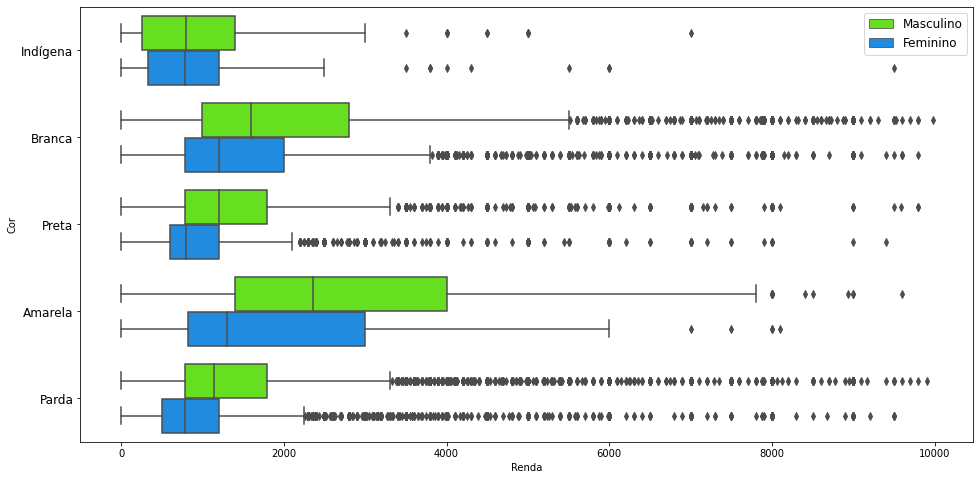

In [96]:
ax = sns.boxplot( y = 'Cor', x = 'Renda', orient = 'h', 
                 data = DataFrame.query('Renda < 10000'), 
                 hue = 'Sexo',
                 palette = 'gist_rainbow')

#config
ax.figure.set_size_inches(16, 8)
# Configurando o label de cada categoria do eixo Y
ax.set_yticklabels(['Indígena', 'Branca', 'Preta', 'Amarela', 'Parda', 'Sem declaração'], fontsize=12)

# Configurações da legenda do gráfico (Sexo)
handles, _ = ax.get_legend_handles_labels()
ax.legend(handles, ['Masculino', 'Feminino'], fontsize=12)

ax

> ### Conclusões

Excluindo parte dos outliers, no caso estabelecendo um limite máximo de renda de BRL 10000, é possivel ver em melhor escala a distribuição de renda entre os entrevistados. 
>
Em todos os grupos de raça, o limite máximo de renda entre as mulheres é menor que o entre homens.
>
O grupo pior remunerado são os indígenas, sendo a distribuição de renda entre gêneros bem similares. 
>
A distribuição entre pretos e pardos são bem similares entre si, inclusive na distribuição por gênero.
>
Sem dúvida alguma os brancos são os melhores remunerados, com destaque absoluto quando são homens. A ponto de que os 25% dos homens brancos piores remunerados possuem mais renda que as 25% mulheres melhores remuneradas para as raças preta, parda e indígena.

# <font color="red">DESAFIO<font>
### Qual percentual de pessoas de nosso <i>dataset</i> ganham um salário mínimo (R$ 788,00) ou menos?
#### <font color='red'>Utilize a função <i>percentileofscore()</i> do <i>scipy</i> para realizar estas análises.</font>
#### Mais informações: https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.percentileofscore.html


In [97]:
from scipy import stats

In [98]:
perc_sal_min = stats.percentileofscore(DataFrame['Renda'], 788.00, kind='rank')
perc_sal_min

#24% das pessoas têm renda de um salário mínimo.

24.390942217595004

### Qual o valor máximo ganho por 99% das pessoas de nosso <i>dataset</i>?
#### <font color='red'>Utilize o método <i>quantile()</i> do <i>pandas</i> para realizar estas análises.</font>

In [99]:
top_99_max = DataFrame['Renda'].quantile(q = 0.99, interpolation='higher')
top_99_max
#A renda mais alta entre 99% dos entrevistados é de BRL 15000

15000

### Obtenha a média, mediana, valor máximo e desvio-padrão da variável RENDA segundo ANOS DE ESTUDO e SEXO
#### <font color='blue'>Destaque os pontos mais importante que você observa nas tabulações</font>
#### <font color='red'>O parâmento <i>aggfunc</i> da função <i>crosstab()</i> pode receber uma lista de funções. Exemplo: <i>aggfunc = ['mean', 'median', 'max', 'std']</i></font>

In [100]:
renda_estudos = pd.crosstab(
    DataFrame['Anos de Estudo'],
    DataFrame['Sexo'],
    aggfunc = ('mean', 'median', 'max','mad','var', 'std'),
    values = DataFrame['Renda'])
#config
renda_estudos.rename(columns = sexo, inplace = True)
renda_estudos.rename(index = anos_de_estudo, inplace = True)
renda_estudos

#As variáveis descritivas mostram que quanto mais anos de estudos, maior a renda.
#As distribuições de valores de renda intra gênero mostram-se parecidas, porém os maiores valores estão entre as pessoas de sexo masculino.
#As medidas apenas confirmam a disparidade de renda entre pessoas do sexo masculino e feminino.

mad                    max            \
Sexo                              Masculino     Feminino Masculino  Feminino   
Anos de Estudo                                                                 
Sem instrução e menos de 1 ano   560.575945   425.929549   30000.0   10000.0   
1 ano                            584.030039   350.257106   30000.0    2000.0   
2 anos                           592.273915   376.442052   40000.0    4000.0   
3 anos                           696.385914   349.816823   80000.0    3500.0   
4 anos                           750.225818   392.274699   50000.0   10000.0   
5 anos                           714.913737   374.528708   35000.0    8000.0   
6 anos                           759.470498   351.395583   25000.0    6000.0   
7 anos                           720.454779   356.281662   40000.0    9000.0   
8 anos                           848.818306   422.685921   30000.0   18000.0   
9 anos                           774.892546   405.206492   60000.0   20000.0   
10 anos                          985.056140   389.757778   45000.0    6000.0   
11 anos                         1166.362641   680.147846  200000.0  100000.0   
12 anos                         1417.123151  1081.643983   30000.0  120000.0   
13 anos                         1869.878195  1146.722928   25000.0   20000.0   
14 anos                         2281.501265  1311.506148   50000.0   20000.0   
15 anos ou mais                 4205.577658  2574.040181  200000.0  100000.0   
Não determinados                 614.090703   286.365603    7000.0    3000.0   

                                       mean                 median           \
Sexo                              Masculino     Feminino Masculino Feminino   
Anos de Estudo                                                                
Sem instrução e menos de 1 ano   799.494638   516.201748     700.0    390.0   
1 ano                            895.629047   492.771987     788.0    400.0   
2 anos                           931.178986   529.911638     788.0    450.0   
3 anos                          1109.203862   546.853916     800.0    500.0   
4 anos                          1302.329283   704.279111    1000.0    788.0   
5 anos                          1338.653218   781.389776    1045.0    788.0   
6 anos                          1448.875419   833.732824    1200.0    788.0   
7 anos                          1465.497940   830.751004    1200.0    788.0   
8 anos                          1639.396667   933.615351    1300.0    800.0   
9 anos                          1508.038850   868.021700    1200.0    788.0   
10 anos                         1731.270847   925.919225    1218.0    800.0   
11 anos                         2117.060504  1286.790889    1500.0   1000.0   
12 anos                         2470.330776  1682.313725    1800.0   1200.0   
13 anos                         3195.099154  1911.730047    2400.0   1300.0   
14 anos                         3706.620269  2226.460457    2500.0   1600.0   
15 anos ou mais                 6134.279790  3899.513231    4000.0   2800.0   
Não determinados                1295.761905   798.174419    1200.0    788.0   

                                        std                        var  \
Sexo                              Masculino     Feminino     Masculino   
Anos de Estudo                                                           
Sem instrução e menos de 1 ano  1023.904884   639.311534  1.048381e+06   
1 ano                           1331.950552   425.291842  1.774092e+06   
2 anos                          1435.173827   498.234168  2.059724e+06   
3 anos                          2143.800133   424.124446  4.595879e+06   
4 anos                          1419.821787   629.553397  2.015894e+06   
5 anos                          1484.650587   635.782641  2.204187e+06   
6 anos                          1476.628602   574.547028  2.180432e+06   
7 anos                          1419.708673   602.038029  2.015573e+06   
8 anos                          1515.583715 

### Construa um box plot da variável RENDA segundo ANOS DE ESTUDO e SEXO
#### <font color='blue'>É possível verificar algum comportamento diferenciado no rendimento entre os grupos de pessoas analisados? Avalie o gráfico e destaque os pontos mais importantes.</font>
#### <font color='red'>1º - Utilize somente as informações de pessoas com renda abaixo de R$ 10.000</font>
#### <font color='red'>2º - Utilize a variável IDADE para identificar se a desigualdade se verifica para pessoas de mesma idade. Exemplo: <i>data=dados.query('Renda < 10000 and Idade == 40')</i> ou <i>data=dados.query('Renda < 10000 and Idade == 50')</i></font>
#### <font color='red'>3º - Para incluir uma terceira variável na construção de um boxplot utilize o parâmetro <i>hue</i> e indique a variável que quer incluir na subdivisão.</font>
#### Mais informações: https://seaborn.pydata.org/generated/seaborn.boxplot.html

In [101]:
import matplotlib.pyplot as plt

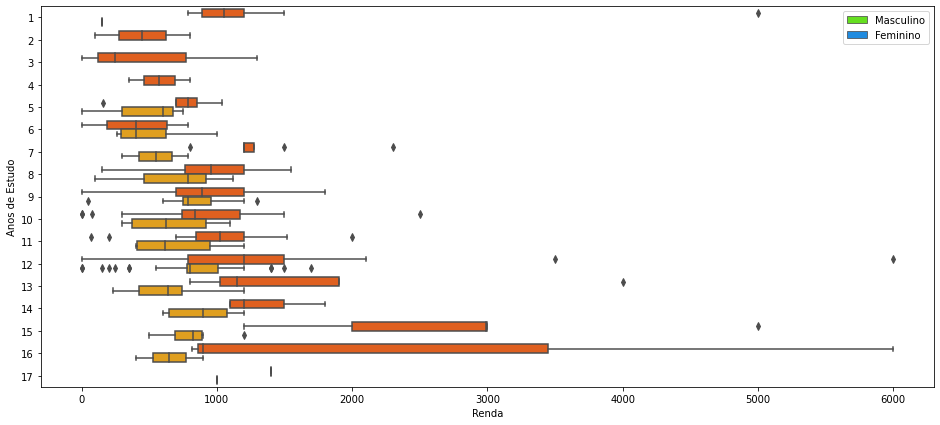

In [102]:
ax1 = (sns.boxplot( y = 'Anos de Estudo', x = 'Renda', orient = 'h', 
                 data = DataFrame.query('Renda < 10000 and Idade == 20'), 
                 hue = 'Sexo',
                 palette = 'autumn'))

ax1.figure.set_size_inches(16, 7)
#Configurando o label de cada categoria do eixo Y
ax1.set_yticklabels(anos_de_estudo)

#Configurações da legenda do gráfico (Sexo)
handles, _ = ax.get_legend_handles_labels()
ax1.legend(handles, ['Masculino', 'Feminino'])

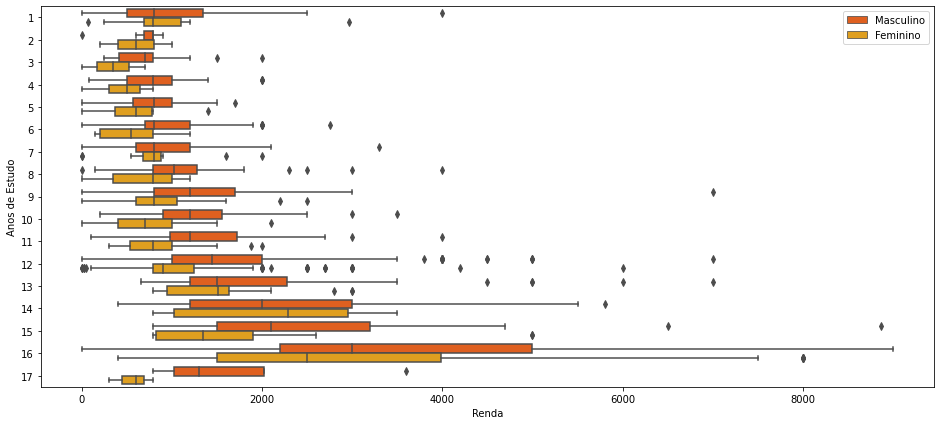

In [103]:
ax2 = (sns.boxplot( y = 'Anos de Estudo', x = 'Renda', orient = 'h', 
                 data = DataFrame.query('Renda < 10000 and Idade == 30'), 
                 hue = 'Sexo',
                 palette = 'autumn'))

ax2.figure.set_size_inches(16, 7)
#Configurando o label de cada categoria do eixo Y
ax2.set_yticklabels(anos_de_estudo)

#Configurações da legenda do gráfico (Sexo)
handles, _ = ax2.get_legend_handles_labels()
ax2.legend(handles, ['Masculino', 'Feminino'])

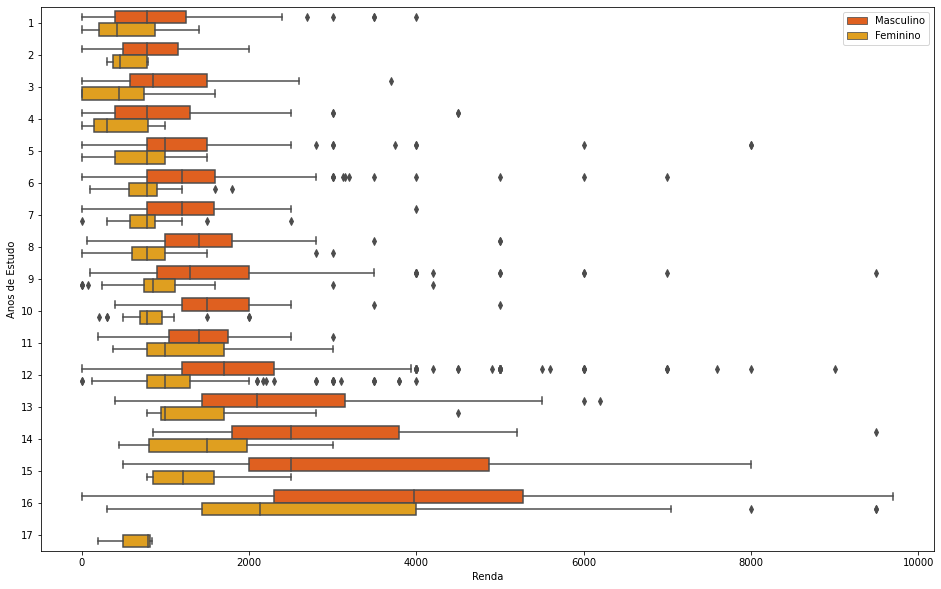

In [104]:
ax3 = (sns.boxplot( y = 'Anos de Estudo', x = 'Renda', orient = 'h', 
                 data = DataFrame.query('Renda < 10000 and Idade == 40'), 
                 hue = 'Sexo',
                 palette = 'autumn'))

ax3.figure.set_size_inches(16, 10)
#Configurando o label de cada categoria do eixo Y
ax3.set_yticklabels(anos_de_estudo)

#Configurações da legenda do gráfico (Sexo)
handles, _ = ax3.get_legend_handles_labels()
ax3.legend(handles, ['Masculino', 'Feminino'])

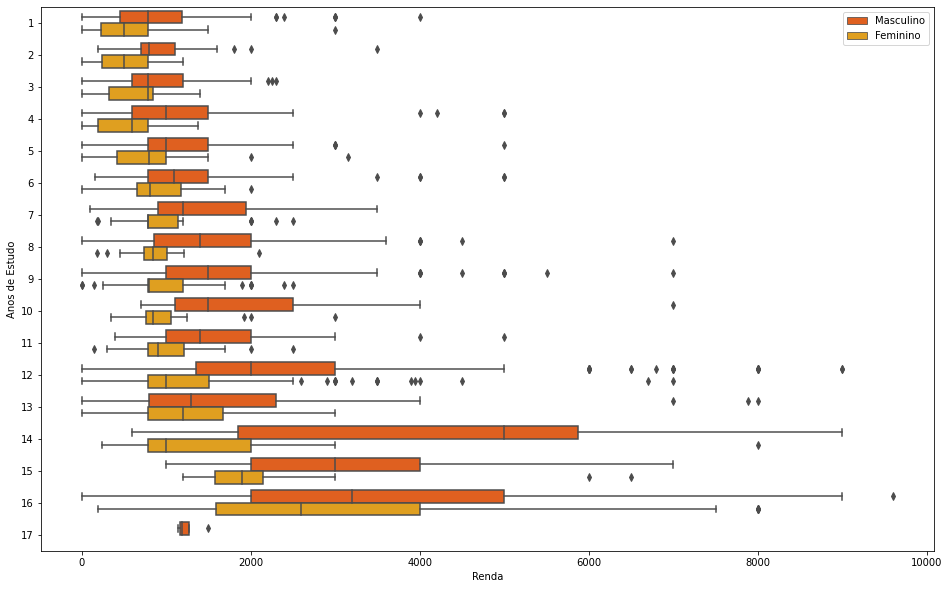

In [105]:
ax4 = (sns.boxplot( y = 'Anos de Estudo', x = 'Renda', orient = 'h', 
                 data = DataFrame.query('Renda < 10000 and Idade == 50'), 
                 hue = 'Sexo',
                 palette = 'autumn'))

ax4.figure.set_size_inches(16, 10)
#Configurando o label de cada categoria do eixo Y
ax4.set_yticklabels(anos_de_estudo)

#Configurações da legenda do gráfico (Sexo)
handles, _ = ax4.get_legend_handles_labels()
ax4.legend(handles, ['Masculino', 'Feminino'])

> ### Conclusões
Independentemente da idade, e aqui testamos para idades cheias (20, 30, 40, e 50 anos), ainda há desigualdade de renda entre homens e mulheres independentemente da geração.
Em todos os cenários testados os homens possuem melhor média e valores mais altos de renda que as mulheres.

### Obtenha a média, mediana, valor máximo e desvio-padrão da variável RENDA segundo as UNIDADES DA FEDERAÇÃO
#### <font color='blue'>Destaque os pontos mais importante que você observa nas tabulações</font>
#### <font color='red'>Utilize o método <i>groupby()</i> do <i>pandas</i> juntamente com o método <i>agg()</i> para contruir a tabulação. O método <i>agg()</i> pode receber um dicionário especificando qual coluna do DataFrame deve ser utilizada e qual lista de funções estatísticas queremos obter, por exemplo: <i>dados.groupby(['UF']).agg({'Renda': ['mean', 'median', 'max', 'std']})</i></font>

In [106]:
renda_UF = DataFrame.groupby(['UF']).agg({'Renda': ['mean', 'median', 'max', 'std']})
renda_UF.rename(index = uf, inplace = True, )
renda_UF.sort_index(inplace = True)
renda_UF

Renda                             
                            mean  median     max          std
UF                                                           
Acre                 1506.091782   900.0   30000  2276.233415
Alagoas              1144.552602   788.0   11000  1237.856197
Amapá                1861.353516  1200.0   15580  2020.688632
Amazonas             1445.130100   900.0   22000  1757.935591
Bahia                1429.645094   800.0  200000  3507.917248
Ceará                1255.403692   789.0   25000  1821.963536
Distrito Federal     4241.954722  2000.0  100000  5550.463338
Espírito Santo       2026.383852  1274.0  100000  3513.846868
Goiás                1994.580794  1500.0   30000  2221.933065
Maranhão             1019.432009   700.0   30000  1887.816905
Mato Grosso          2130.652778  1500.0   35000  2542.630178
Mato Grosso do Sul   2262.604167  1500.0   42000  3031.419122
Minas Gerais         2056.432084  1200.0  100000  3584.721547
Paraná               2493.870753  1500.0  200000  4302.937995
Paraíba              1293.370487   788.0   30000  1950.272431
Pará                 1399.076871   850.0   50000  2053.779555
Pernambuco           1527.079319   900.0   50000  2389.622497
Piauí                1074.550784   750.0   40000  2373.355726
Rio Grande do Norte  1344.721480   800.0   15500  1651.805500
Rio Grande do Sul    2315.158336  1500.0   35000  2913.335783
Rio de Janeiro       2496.403168  1400.0  200000  5214.583518
Rondônia             1789.761223  1200.0   50000  2406.161161
Roraima              1783.588889  1000.0   20000  2079.659238
Santa Catarina       2470.854945  1800.0   80000  3137.651112
Sergipe              1109.111111   788.0   16000  1478.997878
São Paulo            2638.104986  1600.0   80000  3503.777366
Tocantins            1771.094946  1000.0   60000  2934.590741

### Construa um box plot da variável RENDA segundo as UNIDADES DA FEDERAÇÃO
#### <font color='blue'>É possível verificar algum comportamento diferenciado no rendimento entre os grupos analisados? Avalie o gráfico e destaque os pontos mais importantes.</font>
#### <font color='red'>1º - Utilize somente as informações de pessoas com renda abaixo de R$ 10.000</font>

[Text(0, 0, 'Rondônia'),
 Text(0, 0, 'Acre'),
 Text(0, 0, 'Amazonas'),
 Text(0, 0, 'Roraima'),
 Text(0, 0, 'Pará'),
 Text(0, 0, 'Amapá'),
 Text(0, 0, 'Tocantins'),
 Text(0, 0, 'Maranhão'),
 Text(0, 0, 'Piauí'),
 Text(0, 0, 'Ceará'),
 Text(0, 0, 'Rio Grande do Norte'),
 Text(0, 0, 'Paraíba'),
 Text(0, 0, 'Pernambuco'),
 Text(0, 0, 'Alagoas'),
 Text(0, 0, 'Sergipe'),
 Text(0, 0, 'Bahia'),
 Text(0, 0, 'Minas Gerais'),
 Text(0, 0, 'Espírito Santo'),
 Text(0, 0, 'Rio de Janeiro'),
 Text(0, 0, 'São Paulo'),
 Text(0, 0, 'Paraná'),
 Text(0, 0, 'Santa Catarina'),
 Text(0, 0, 'Rio Grande do Sul'),
 Text(0, 0, 'Mato Grosso do Sul'),
 Text(0, 0, 'Mato Grosso'),
 Text(0, 0, 'Goiás'),
 Text(0, 0, 'Distrito Federal')]

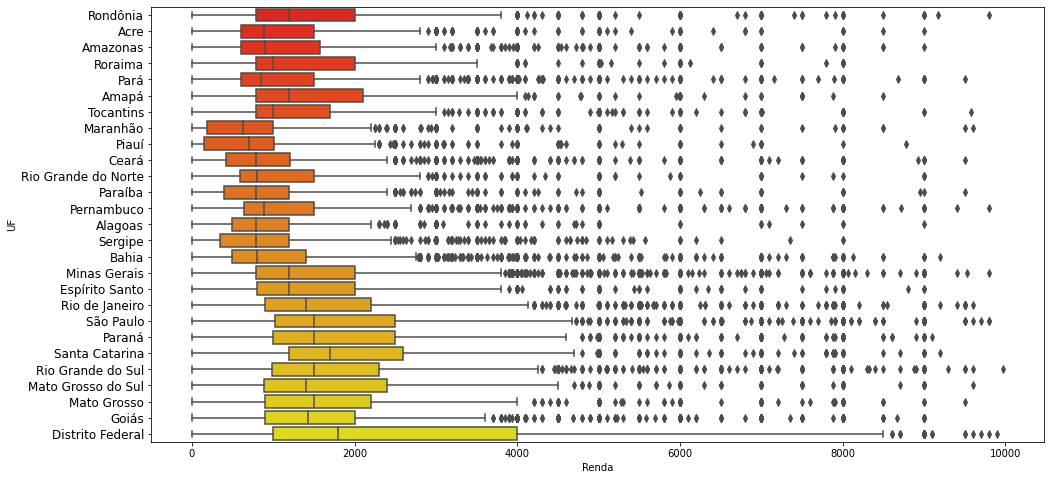

In [121]:
ax = (sns.boxplot( y = 'UF', x = 'Renda', orient = 'h', 
                 data = DataFrame.query('Renda < 10000'), 
                 palette = 'autumn'))

ax.figure.set_size_inches(16, 8)
# Configurando o label de cada categoria do eixo Y
ax.set_yticklabels( ['Rondônia', 'Acre', 'Amazonas', 'Roraima', 'Pará', 'Amapá', 'Tocantins', 'Maranhão', 'Piauí', 'Ceará', 'Rio Grande do Norte','Paraíba', 'Pernambuco', 'Alagoas', 'Sergipe', 'Bahia', 'Minas Gerais', 'Espírito Santo', 'Rio de Janeiro', 'São Paulo', 'Paraná', 'Santa Catarina', 'Rio Grande do Sul', 'Mato Grosso do Sul', 'Mato Grosso', 'Goiás', 'Distrito Federal'], fontsize=12)

#Configurações da legenda do gráfico (Sexo)
#handles, _ = ax.get_legend_handles_labels()
#ax.legend(handles, ['Masculino', 'Feminino'])

> ### Conclusões

Observa-se que a renda também varia quando ao estado, sendo que a região mais rica do país concentra-se nos estados do sul, sudeste e centro-oeste. Perto dos grandes centros urbanos e maiores rendas pela industria agropecuária. Destaque para o distrito federal, a sede do governo federal possui a maior renda média do país. 